In [31]:
import os
current_directory = os.getcwd()
print(current_directory)

/home/jolivera/Documents/CloudSkin/cloudskin-learning-plane/learning-plane/app/train


In [15]:
import pandas as pd
df=pd.read_csv("/home/jolivera/Documents/CloudSkin/cloudskin-learning-plane/learning-plane/data/archive/preprocessed_data_2024-05-08 08:45:00.csv",sep=";")

In [19]:
df.columns

Index(['timestamp', 'cluster', 'pipeline_id', 'pipelines_status_avg_fps',
       'pipelines_status_avg_pipeline_latency',
       'pipelines_status_count_pipeline_latency',
       'pipelines_status_elapsed_time', 'pipelines_status_frame_count',
       'pipelines_status_realtime_pipeline_latency',
       'pipelines_status_start_time', 'pipelines_status_sum_pipeline_latency',
       'pipelines_status_idelta_fps', 'node_cpu_usage', 'node_mem_usage',
       'pipelines_server_cpu_usage', 'pipelines_server_mem_usage',
       'node_cpu_usage_scaled', 'node_mem_usage_scaled',
       'pipelines_server_cpu_usage_scaled',
       'pipelines_server_mem_usage_scaled'],
      dtype='object')

In [20]:
colnames_to_drop=['pipeline_id', 'pipelines_status_avg_fps',
       'pipelines_status_avg_pipeline_latency',
       'pipelines_status_count_pipeline_latency',
       'pipelines_status_elapsed_time', 'pipelines_status_frame_count',
       'pipelines_status_start_time', 'pipelines_status_sum_pipeline_latency',
       'node_cpu_usage', 'node_mem_usage',
       'pipelines_server_cpu_usage', 'pipelines_server_mem_usage'
       ]

In [21]:
df.drop(colnames_to_drop, axis=1, inplace=True)

In [22]:
df.head()

,timestamp,cluster,pipelines_status_realtime_pipeline_latency,pipelines_status_idelta_fps,node_cpu_usage_scaled,node_mem_usage_scaled,pipelines_server_cpu_usage_scaled,pipelines_server_mem_usage_scaled
0,2024-05-08 07:45:00,a6050a48-03a9-4d02-927a-878317624b52,0.070234,24.793670,0.017781,0.011011,0.774434,0.855817
1,2024-05-08 07:45:00,c2313dca-f464-4fe3-96c6-cdbe530fe89e,0.064005,25.005381,0.743896,0.969282,0.989625,0.078814
2,2024-05-08 07:45:05,a6050a48-03a9-4d02-927a-878317624b52,0.064620,24.996583,0.017781,0.011011,0.774434,0.855817
3,2024-05-08 07:45:05,c2313dca-f464-4fe3-96c6-cdbe530fe89e,0.066208,24.998362,0.705945,0.973024,0.644016,0.078814
4,2024-05-08 07:45:10,a6050a48-03a9-4d02-927a-878317624b52,0.052650,25.004468,0.017781,0.011011,0.774434,0.855817


In [23]:

# Convert timestamp to datetime
df["timestamp"] = df["timestamp"].astype(
    "datetime64[s]"
)


# Use groupby with pd.Grouper to resample and calculate the mean for each 15-second interval and each cluster
data = (
    df.groupby(
        [
            pd.Grouper(key="timestamp", freq="15s"),
            "cluster"
        ]
    )
    .mean()
    .reset_index()
)

In [25]:
data.head()

,timestamp,cluster,pipelines_status_realtime_pipeline_latency,pipelines_status_idelta_fps,node_cpu_usage_scaled,node_mem_usage_scaled,pipelines_server_cpu_usage_scaled,pipelines_server_mem_usage_scaled
0,2024-05-08 07:45:00,a6050a48-03a9-4d02-927a-878317624b52,0.062501,24.931574,0.017781,0.011011,0.774434,0.855817
1,2024-05-08 07:45:00,c2313dca-f464-4fe3-96c6-cdbe530fe89e,0.068872,24.935429,0.718595,0.971776,0.873241,0.078814
2,2024-05-08 07:45:15,a6050a48-03a9-4d02-927a-878317624b52,0.073844,25.001438,0.031228,0.012225,0.770736,0.862586
3,2024-05-08 07:45:15,c2313dca-f464-4fe3-96c6-cdbe530fe89e,0.066262,24.999683,0.705945,0.973024,0.986044,0.101715
4,2024-05-08 07:45:30,a6050a48-03a9-4d02-927a-878317624b52,0.070810,24.925991,0.037951,0.012833,0.767035,0.865971


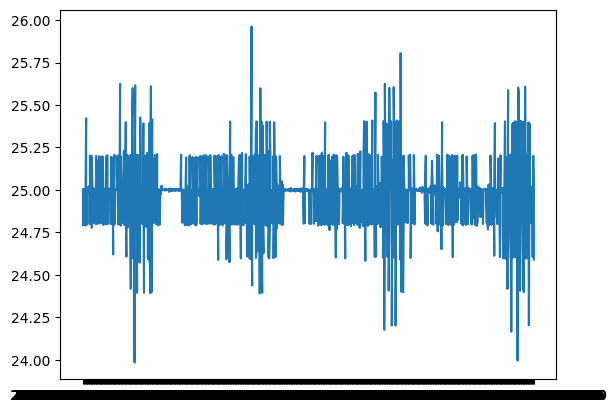

In [8]:
import matplotlib.pyplot as plt

plt.plot(df['timestamp'],df['pipelines_status_idelta_fps'])

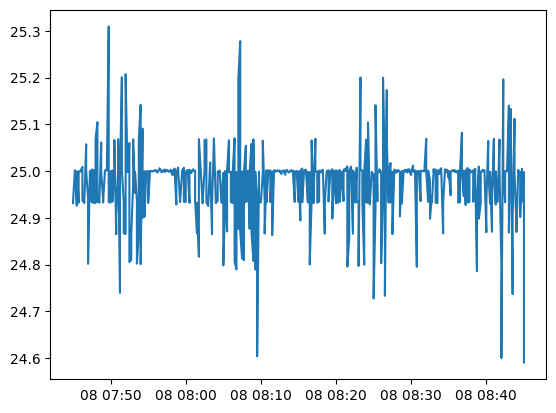

In [26]:
import matplotlib.pyplot as plt

plt.plot(data['timestamp'],data['pipelines_status_idelta_fps'])

In [29]:
# Sort by cluster and timestamp
data = data.sort_values(by=["cluster", "timestamp"])

In [35]:
import sys
sys.path.append(current_directory)  # Adjust this path
from model_types.LSTM import Training_LSTM, LSTM

In [ ]:
train=Training_LSTM(data,**config_params)

In [ ]:
grouped_data = group_data()
train_test_split_data = train_test_split(grouped_data)
tensor_data = convert_to_tensor(train_test_split_data)
dataloader_data = setup_dataloader(tensor_data)
models = initialize_training(dataloader_data)